<a href="https://colab.research.google.com/github/singlavanshu/Rockslide_Prediction/blob/main/rockslideprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
file_path = "/content/Combine_dg2_TM.xlsx"

In [ ]:
from pandas import read_excel
from matplotlib import pyplot

dataset = read_excel(file_path, header=0, index_col=0)
values = dataset.values


groups = [0, 2, 4, 6 , 8 ,10 ,12, 14, 16]
i = 1

pyplot.figure(figsize=(20,100))  # Adjust figure size if needed
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1

pyplot.tight_layout()  # Adjust layout
pyplot.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/Combine_dg2_TM.xlsx'

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[1,3,5,7,9,11,13,15,17]], axis=1, inplace=True)
print(reframed.head())

In [ ]:

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:2300, :]
test = values[2300:, :]

print(train.shape, test.shape)
print(train)


In [ ]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print (train_y)

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)
#history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## FINAL CODE (DG2)


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


file_path = "/content/Combine_dg2_TM.xlsx"
from pandas import read_excel
from matplotlib import pyplot

dataset = read_excel(file_path, header=0, index_col=0)
values = dataset.values

# Specify columns to plot
groups = [0, 2, 4, 6 , 8 ,10 ,12, 14, 16]
i = 1

# Plot each column
pyplot.figure(figsize=(20,60))  # Adjust figure size if needed
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1

pyplot.tight_layout()  # Adjust layout
pyplot.show()


# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[1,3,5,7,9,11,13,15,17]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train = values[:2300, :]
test = values[2300:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)

pyplot.figure(figsize=(20,10))
pyplot.plot(test_y,label="original")
pyplot.plot(yhat,label="predicted")
pyplot.legend()
pyplot.show()

rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

## LSTM  (tilt meter )

In [ ]:



import numpy as np
import matplotlib.pyplot as plt

num_subplots = len(groups) // 3

fig, axs = plt.subplots(num_subplots, 1, figsize=(20, 10*num_subplots))

for i in range(num_subplots):
    start_idx = i * 3
    end_idx = min(start_idx + 3, len(groups))
    group_indices = groups[start_idx:end_idx]

    for j, group in enumerate(group_indices):
        axs[i].plot(values[:, group], label=dataset.columns[group])

    axs[i].set_title(', '.join(dataset.columns[group_indices]), loc='right', fontsize=10)
    axs[i].legend()

plt.tight_layout()
plt.show()
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace=True)
	return agg
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[1,3,5,7,9,11,13,15,17]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train = values[:2300, :]
test = values[2300:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)

pyplot.figure(figsize=(20,10))
pyplot.plot(test_y,label="original")
pyplot.plot(yhat,label="predicted")
pyplot.legend()
pyplot.show()


## practice


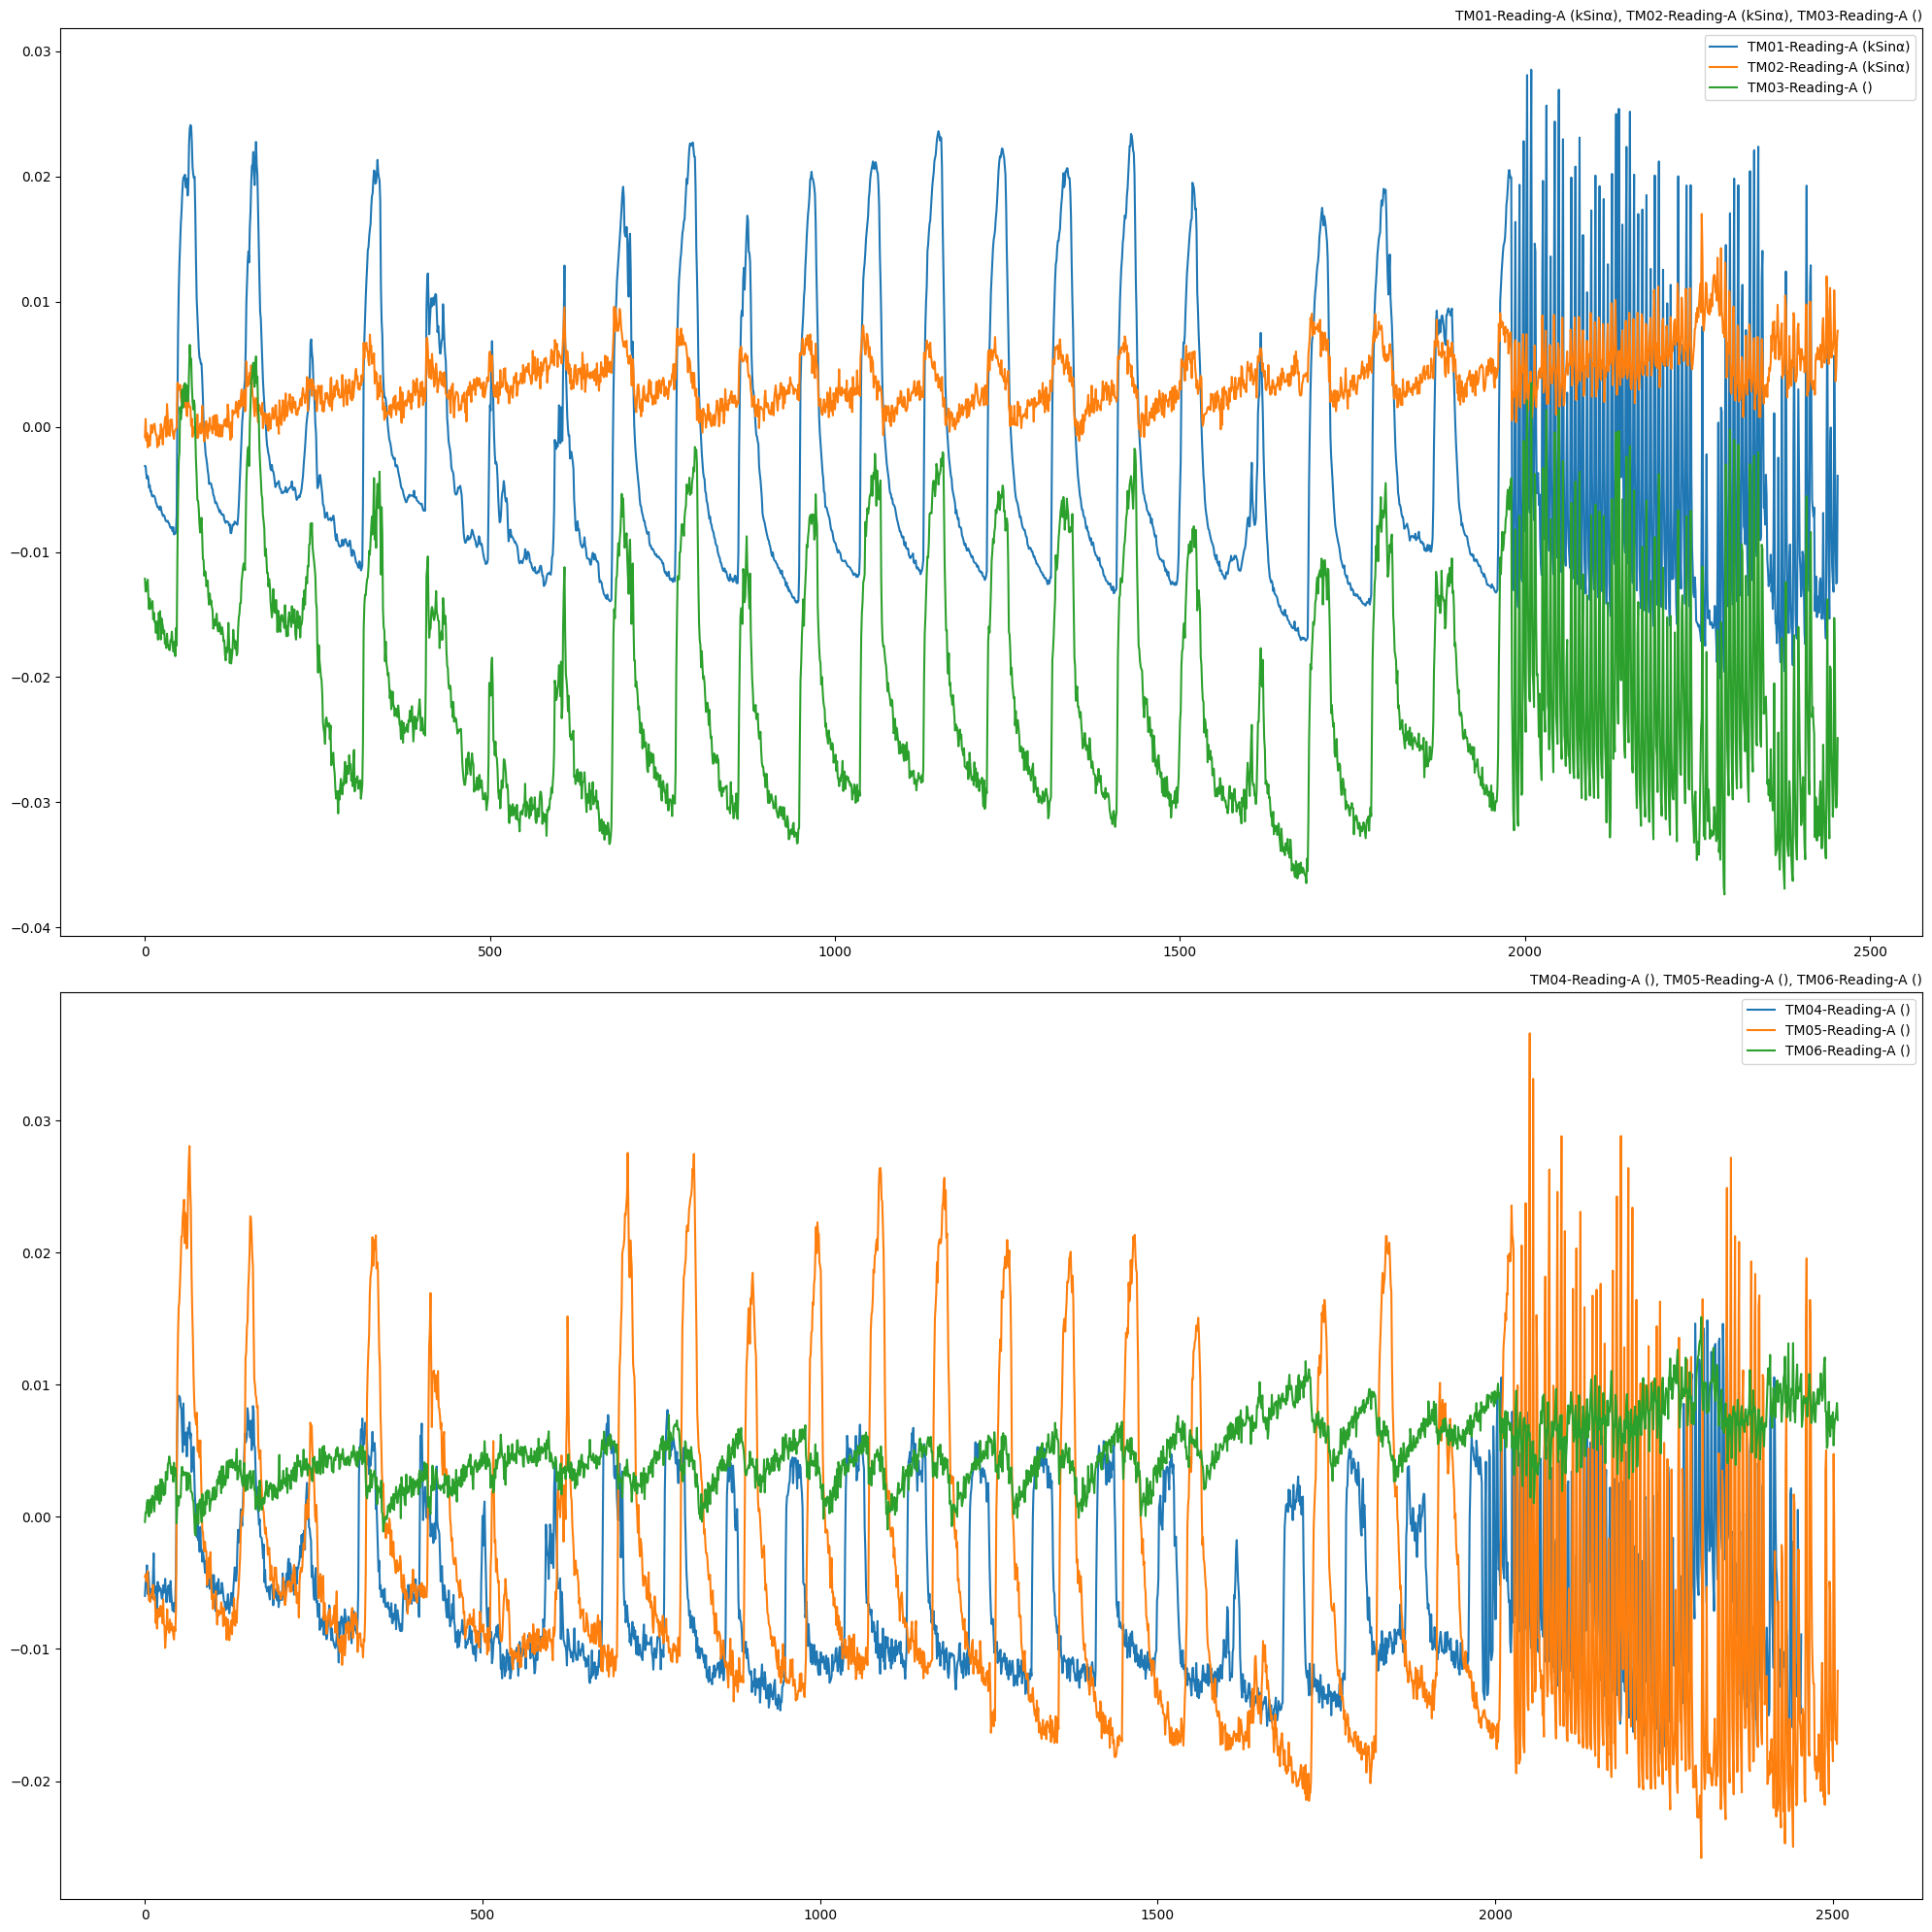

Epoch 1/10
72/72 [==============================] - 3s 12ms/step - loss: 0.0864 - val_loss: 0.1471
Epoch 2/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.1335
Epoch 3/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.1061
Epoch 4/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0412 - val_loss: 0.0983
Epoch 5/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0903
Epoch 6/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0350 - val_loss: 0.0910
Epoch 7/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0346 - val_loss: 0.0875
Epoch 8/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0330 - val_loss: 0.0842
Epoch 9/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0312 - val_loss: 0.0789
Epoch 10/10
72/72 [==============================] - 0s 4ms/step - loss: 0.0297 - val_loss: 0.0775


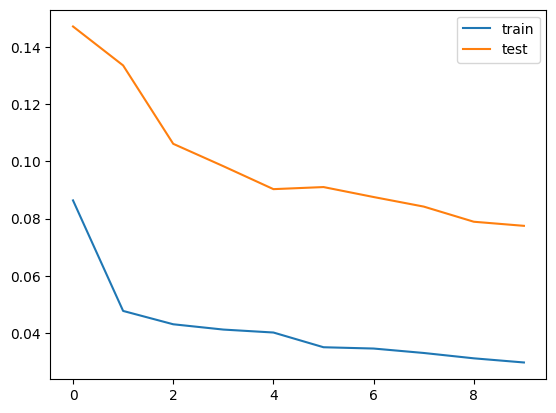

5/5 [==============================] - 0s 4ms/step


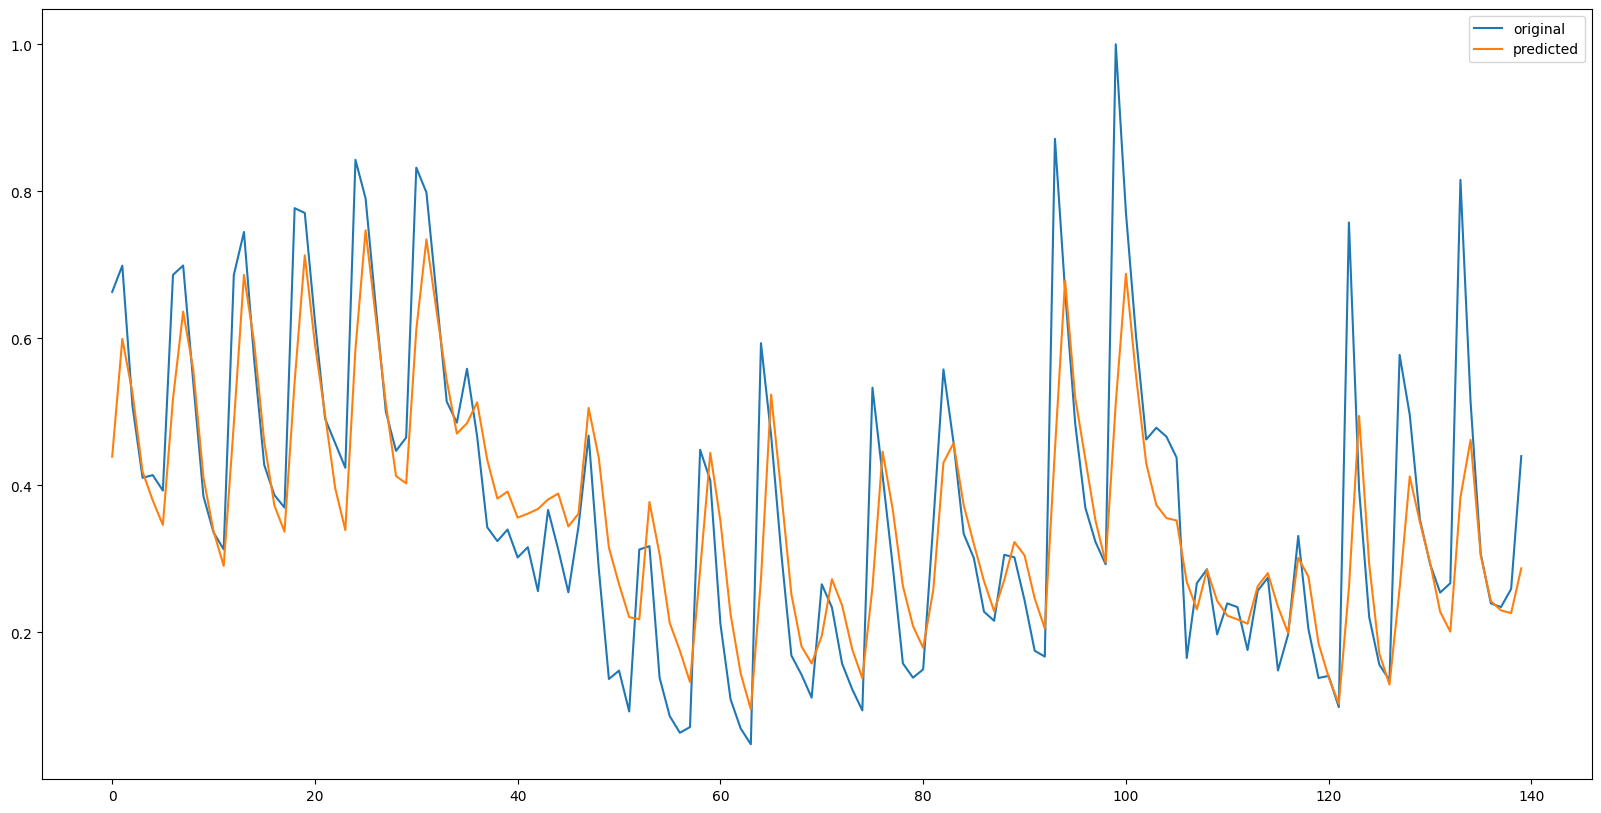

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Load data from Excel file
file_path = "/content/TM_combine_data.xlsx"
from pandas import read_excel
from matplotlib import pyplot

dataset = read_excel(file_path, header=0, index_col=0)
values = dataset.values

# Specify columns to plot
groups = [0, 3, 6, 9 ,12, 15]

import numpy as np
import matplotlib.pyplot as plt

num_subplots = len(groups) // 3

fig, axs = plt.subplots(num_subplots, 1, figsize=(20, 10*num_subplots))

for i in range(num_subplots):
    start_idx = i * 3
    end_idx = min(start_idx + 3, len(groups))
    group_indices = groups[start_idx:end_idx]

    for j, group in enumerate(group_indices):
        axs[i].plot(values[:, group], label=dataset.columns[group])

    axs[i].set_title(', '.join(dataset.columns[group_indices]), loc='right', fontsize=10)
    axs[i].legend()

plt.tight_layout()
plt.show()
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	agg = concat(cols, axis=1)
	agg.columns = names
	if dropnan:
		agg.dropna(inplace=True)
	return agg
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[1,3,5,7,9,11,13,15,17]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train = values[:2300, :]
test = values[2300:, :]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)

pyplot.figure(figsize=(20,10))
pyplot.plot(test_y,label="original")
pyplot.plot(yhat,label="predicted")
pyplot.legend()
pyplot.show()


## PROPHET (tilt meter)


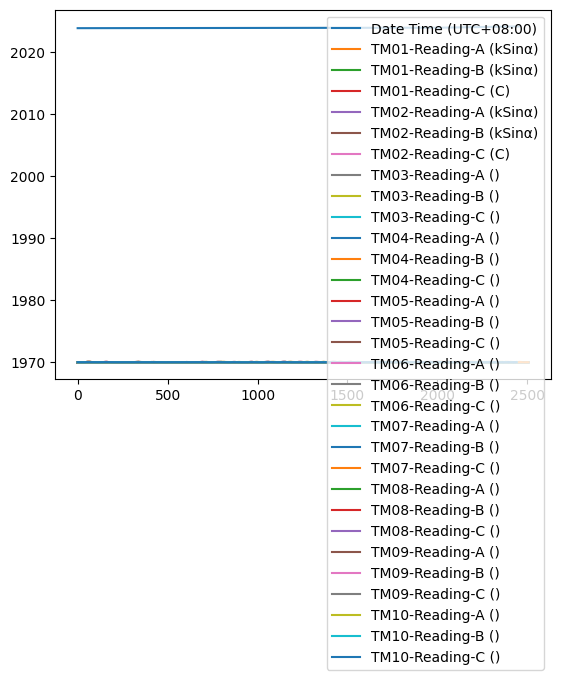

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o_o5kku/_bwbecvq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o_o5kku/bzbd1m9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8943', 'data', 'file=/tmp/tmp4o_o5kku/_bwbecvq.json', 'init=/tmp/tmp4o_o5kku/bzbd1m9b.json', 'output', 'file=/tmp/tmp4o_o5kku/prophet_model8ynamtwt/prophet_model-20240319055127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


                      ds
0    2023-11-24 00:00:00
1    2023-11-24 00:15:00
2    2023-11-24 00:30:00
3    2023-11-24 00:45:00
4    2023-11-24 01:00:00
...                  ...
8923 2024-02-29 22:45:00
8924 2024-02-29 23:00:00
8925 2024-02-29 23:15:00
8926 2024-02-29 23:30:00
8927 2024-02-29 23:45:00

[8928 rows x 1 columns]


05:51:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


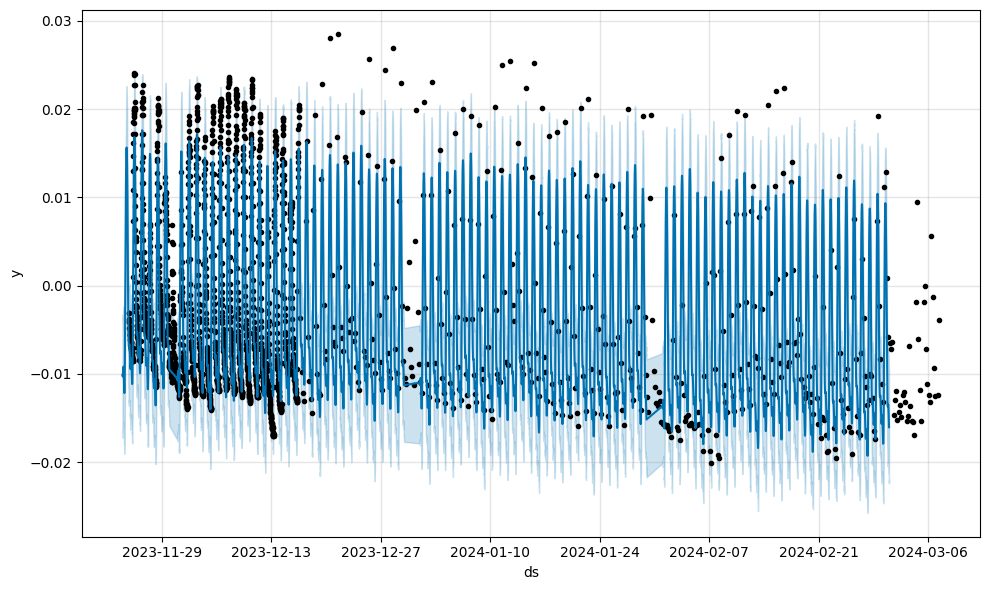

In [ ]:
from pandas import read_excel
import pandas as pd
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
path = '/content/TM_combine_data.xlsx'
df = pd.read_excel(path, header=0)
df.plot()
pyplot.show()
columns_to_keep = ['Date Time (UTC+08:00)', 'TM01-Reading-A (kSinα)']
from pandas import read_csv
from pandas import to_datetime
df = df[columns_to_keep].copy()
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
from pandas import DataFrame, to_datetime

future = []
for year in range(2023, 2024):
    for month in range(11, 12):
        for day in range(24, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2023, 2024):
    for month in range(12, 13):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2024, 2025):
    for month in range(1,3):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

future_df = DataFrame(future, columns=['ds'])
future_df['ds'] = to_datetime(future_df['ds'], format='%d-%m-%Y %H:%M')

#print(future_df)
model = Prophet()
model.fit(df)
forecast = model.predict(future_df)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()

## LSTM (crack meter )

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

file_path = "/content/CM_Combine_Data.xlsx"
from pandas import read_excel
from matplotlib import pyplot

dataset = read_excel(file_path, header=0, index_col=0)
values = dataset.values

groups = [0, 1, 2, 3 , 4 ,5,6, 7, 8, 9, 10, 11]
i = 1

pyplot.figure(figsize=(20,60))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1

pyplot.tight_layout()
pyplot.show()


# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	agg = concat(cols, axis=1)
	agg.columns = names

	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# split into train and test sets
values = reframed.values
train = values[:2300, :]
test = values[2300:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

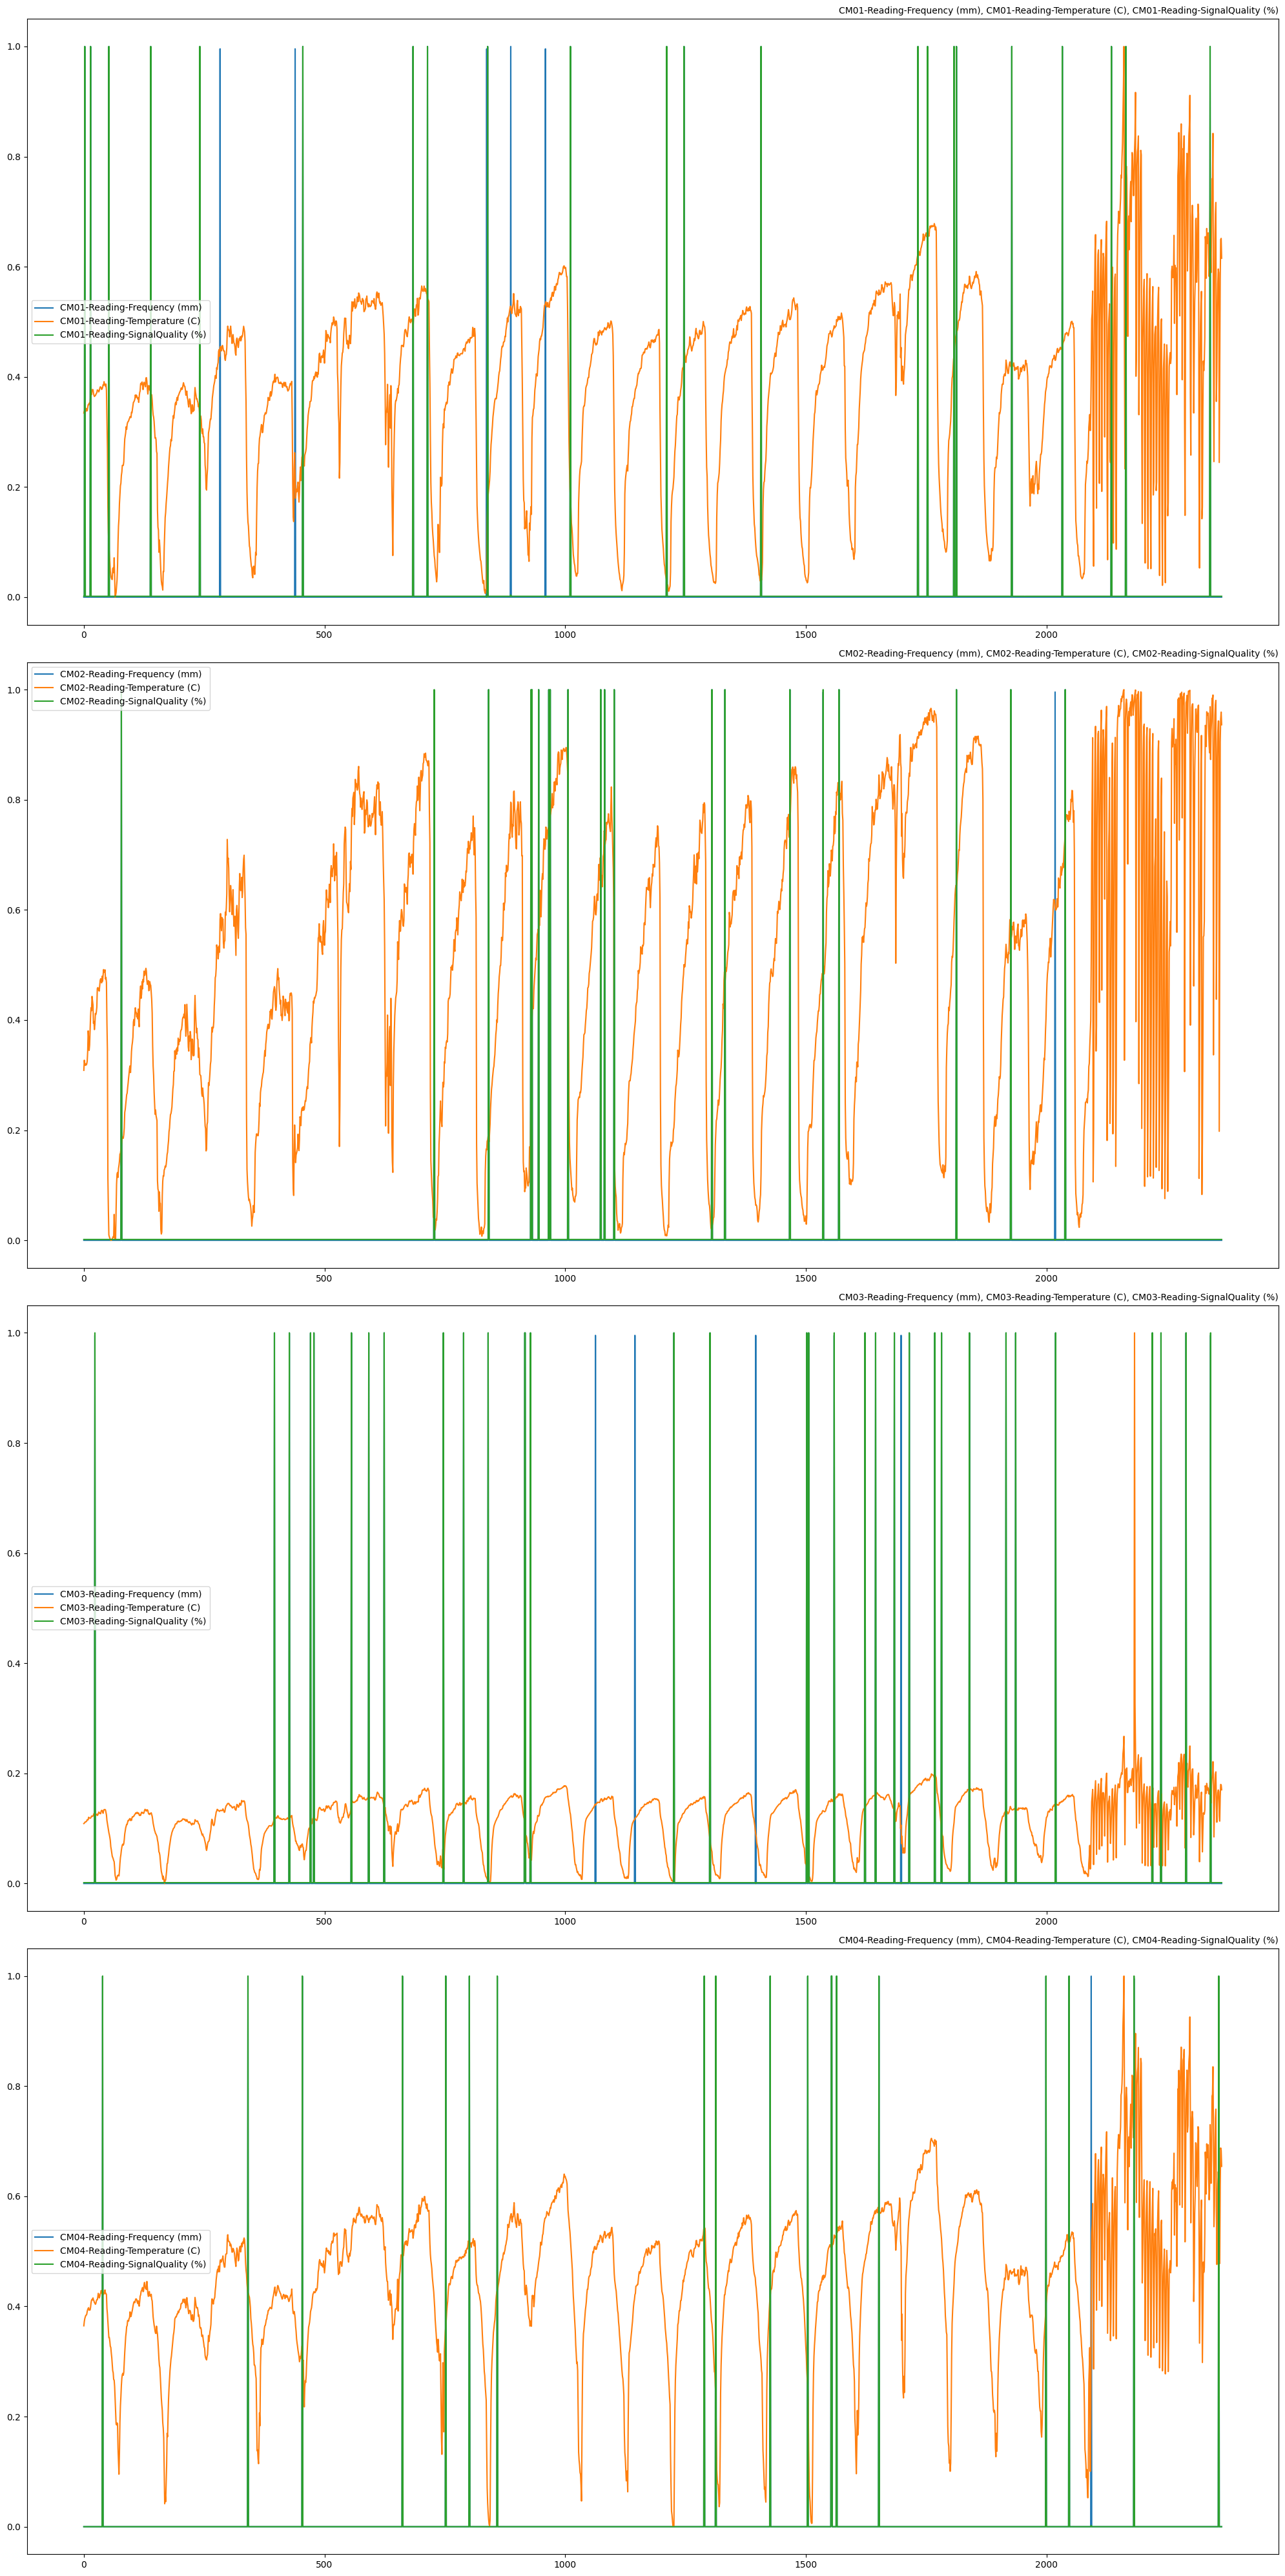

Epoch 1/10
63/63 [==============================] - 4s 15ms/step - loss: 0.0127 - val_loss: 0.0122
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0096 - val_loss: 0.0114
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0108
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0113
Epoch 5/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0080 - val_loss: 0.0100
Epoch 6/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0098
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 8/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0092
Epoch 9/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0069 - val_loss: 0.0091
Epoch 10/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0071


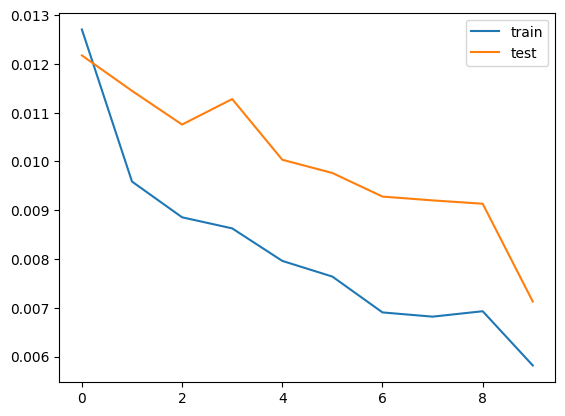

12/12 [==============================] - 0s 3ms/step


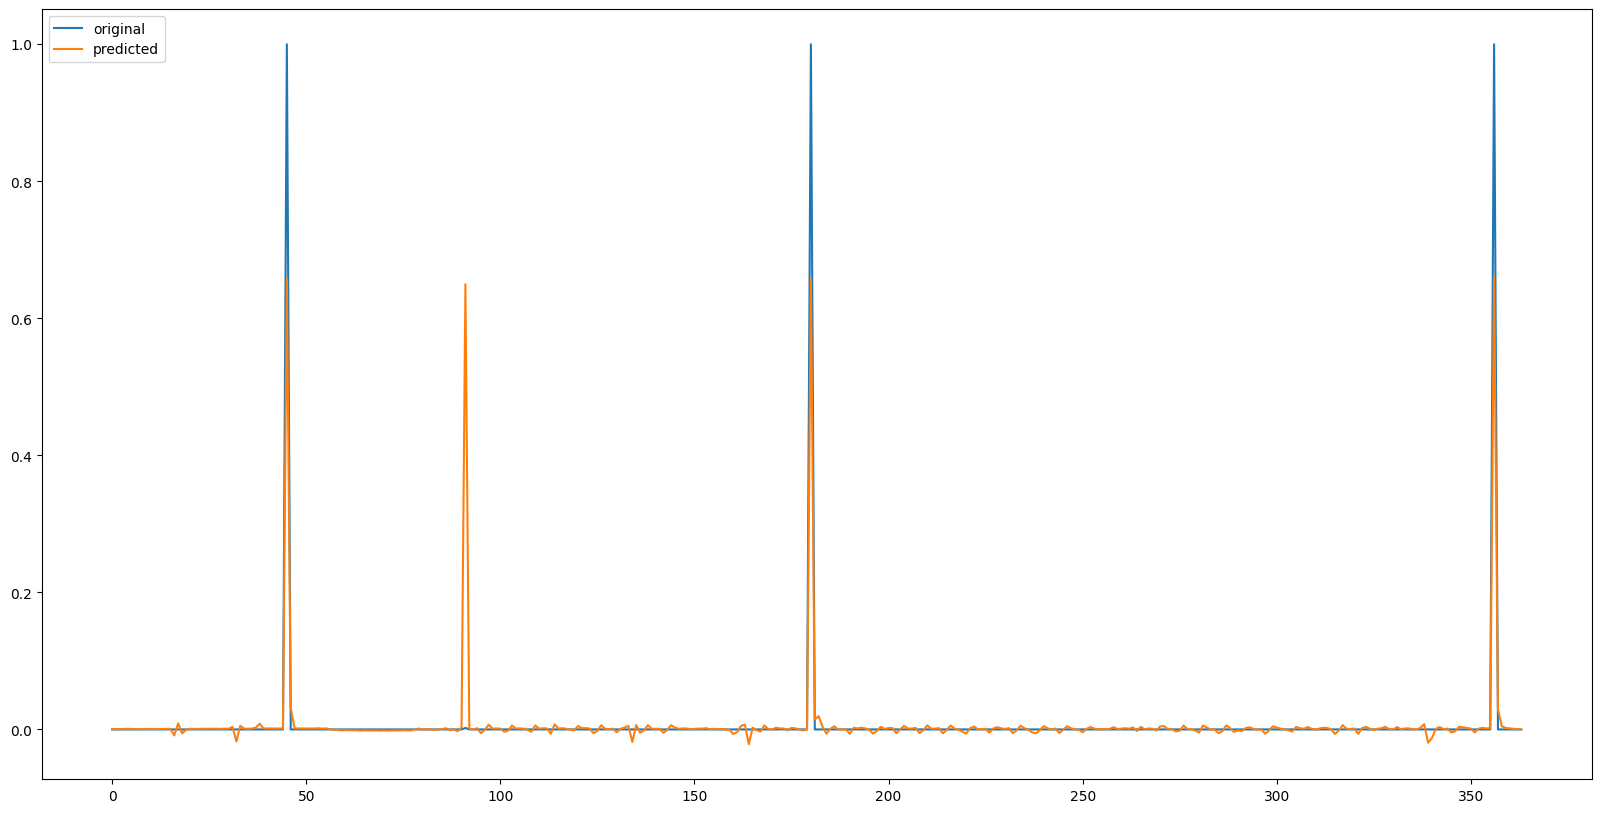

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_subplots = len(groups) // 3

fig, axs = plt.subplots(num_subplots, 1, figsize=(20, 10*num_subplots))

for i in range(num_subplots):
    start_idx = i * 3
    end_idx = min(start_idx + 3, len(groups))
    group_indices = groups[start_idx:end_idx]

    for j, group in enumerate(group_indices):
        axs[i].plot(values[:, group], label=dataset.columns[group])
    axs[i].set_title(', '.join(dataset.columns[group_indices]), loc='right', fontsize=10)
    axs[i].legend()

plt.tight_layout()
plt.show()

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[1,3,5,7,9,11,13,15,17]], axis=1, inplace=True)

# split into train and test sets
values = reframed.values
train = values[:2000, :]
test = values[2000:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)

pyplot.figure(figsize=(20,10))
pyplot.plot(test_y,label="original")
pyplot.plot(yhat,label="predicted")
pyplot.legend()
pyplot.show()

## prophet (crack meter)

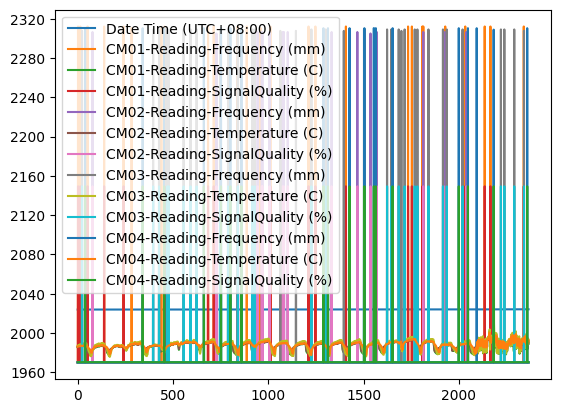

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o_o5kku/72o348gm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4o_o5kku/mo38wew2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60611', 'data', 'file=/tmp/tmp4o_o5kku/72o348gm.json', 'init=/tmp/tmp4o_o5kku/mo38wew2.json', 'output', 'file=/tmp/tmp4o_o5kku/prophet_modelutw2y6k4/prophet_model-20240319062133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


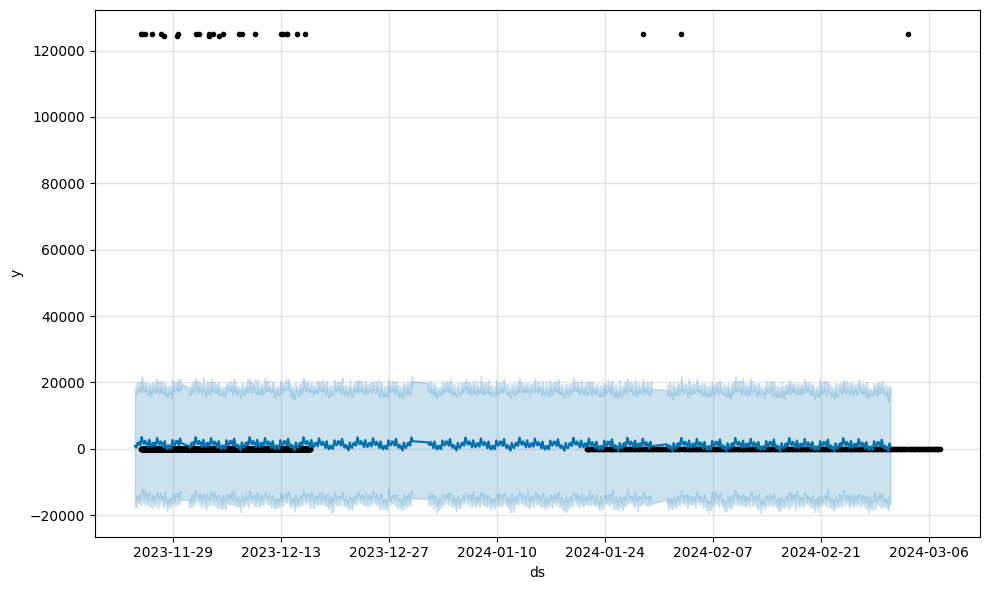

In [ ]:
from pandas import read_excel
import pandas as pd
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
path = '/content/CM_Combine_Data.xlsx'
df = pd.read_excel(path, header=0)
df.plot()
pyplot.show()
columns_to_keep = ['Date Time (UTC+08:00)', 'CM01-Reading-Frequency (mm)']
from pandas import read_csv
from pandas import to_datetime
df = df[columns_to_keep].copy()
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
from pandas import DataFrame, to_datetime

future = []
for year in range(2023, 2024):
    for month in range(11, 12):
        for day in range(24, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2023, 2024):
    for month in range(12, 13):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2024, 2025):
    for month in range(1,3):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

future_df = DataFrame(future, columns=['ds'])
future_df['ds'] = to_datetime(future_df['ds'], format='%d-%m-%Y %H:%M')

#print(future_df)
model = Prophet()
model.fit(df)
forecast = model.predict(future_df)
#print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
pyplot.show()

## prophet


In [ ]:
from pandas import read_excel
import pandas as pd
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

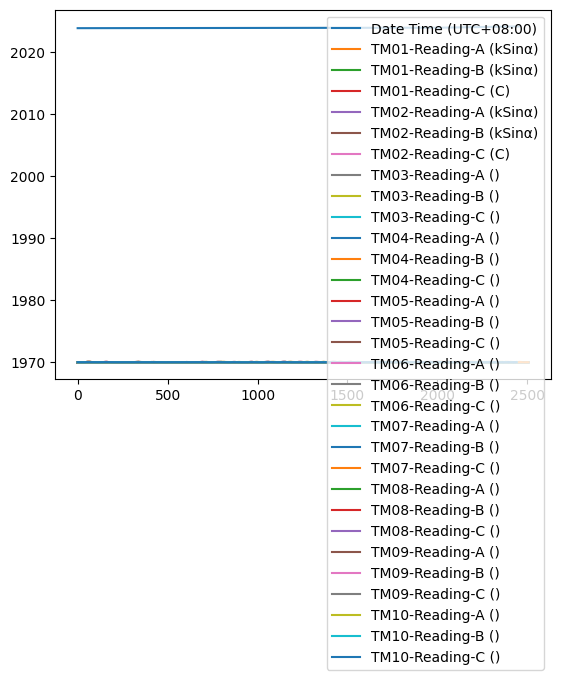

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
path = '/content/TM_combine_data.xlsx'
df = pd.read_excel(path, header=0)
df.plot()
pyplot.show()

In [ ]:
columns_to_keep = ['Date Time (UTC+08:00)', 'TM01-Reading-A (kSinα)']
from pandas import read_csv
from pandas import to_datetime
df = df[columns_to_keep].copy()

In [ ]:
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [ ]:
from pandas import DataFrame, to_datetime

future = []
for year in range(2023, 2024):
    for month in range(11, 13):
        for day in range(24, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

for year in range(2024, 2025):
    for month in range(1,3):
        for day in range(1, 30):
            for hour in range(0, 24):
                for minute in range(0, 60,15):
                        date = f'{day:02d}-{month:02d}-{year:04d} {hour:02d}:{minute:02d}'
                        future.append([date])

future_df = DataFrame(future, columns=['ds'])
future_df['ds'] = to_datetime(future_df['ds'], format='%d-%m-%Y %H:%M')

print(future_df.head())

                   ds
0 2023-11-24 00:00:00
1 2023-11-24 00:15:00
2 2023-11-24 00:30:00
3 2023-11-24 00:45:00
4 2023-11-24 01:00:00


In [ ]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnspada_9/5lnl8ngo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnspada_9/znttgw26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71794', 'data', 'file=/tmp/tmpnspada_9/5lnl8ngo.json', 'init=/tmp/tmpnspada_9/znttgw26.json', 'output', 'file=/tmp/tmpnspada_9/prophet_modelku6c3e0r/prophet_model-20240319041050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(future_df)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

                   ds      yhat  yhat_lower  yhat_upper
0 2023-11-24 00:00:00 -0.010110   -0.016543   -0.003505
1 2023-11-24 00:15:00 -0.010244   -0.016679   -0.003368
2 2023-11-24 00:30:00 -0.010305   -0.016668   -0.004215
3 2023-11-24 00:45:00 -0.010294   -0.016461   -0.003317
4 2023-11-24 01:00:00 -0.010217   -0.016517   -0.003704


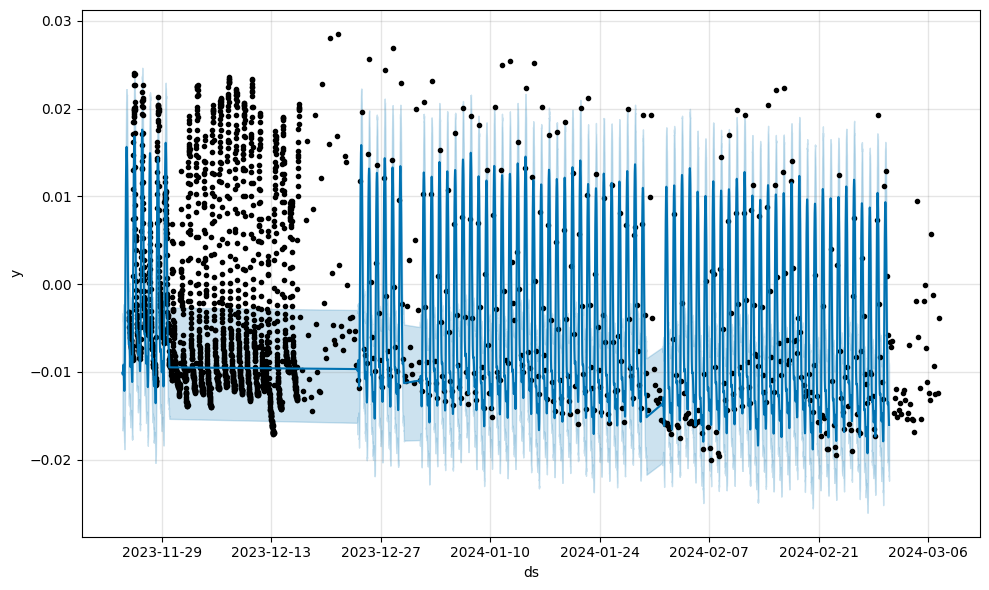

In [ ]:
model.plot(forecast)
pyplot.show()